In [ ]:
import os 
os.chdir('/content/drive/MyDrive/ICH dataset/Patients_CT/')

In [ ]:
import numpy as np
import cv2
import glob
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
files=glob.glob("/content/drive/MyDrive/ICH dataset/Patients_CT/*/brain/*.jpg")
SIZE = 256

In [ ]:
y=[]
x=[]
for i in files:
  sub_heading=i.split('/')
  sub_heading2=sub_heading[8].split('.')
  try:
    index=int(sub_heading2[0][0:2])
  except:
    index=int(sub_heading2[0][0:1])
  search=str(index)+"_"+"HGE_Seg.jpg"
  if(sub_heading[8]==search):
    img=cv2.imread(i,0)
    img= Image.fromarray(img)
    img = img.resize((SIZE, SIZE))
    y.append(np.array(img))
    img2_name=""
    for a in range(8):
      img2_name=img2_name+sub_heading[a]+"/"
    img2_name=img2_name+str(index)+".jpg"
    img2=cv2.imread(img2_name,0)
    img2= Image.fromarray(img2)
    img2 = img2.resize((SIZE, SIZE))
    x.append(np.array(img2))

In [ ]:
x=np.expand_dims(x,3)
x=np.array(x)
y=np.array(y)

NameError: ignored

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda


def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):

    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
from keras.utils import normalize
X_dataset = np.expand_dims(normalize(np.array(x), axis=1),3)
Y_dataset= np.expand_dims((np.array(y)),3) /255.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dataset,Y_dataset, test_size = 0.20, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.10, random_state = 0)

In [ ]:
print(np.shape(X_train))
print(np.shape(y_train))

(228, 256, 256, 1)
(228, 256, 256, 1)


In [ ]:
print(np.shape(X_test))
print(np.shape(y_test))

(64, 256, 256, 1)
(64, 256, 256, 1)


In [ ]:
IMG_HEIGHT = X_dataset.shape[1]
IMG_WIDTH  = X_dataset.shape[2]
IMG_CHANNELS = X_dataset.shape[3]


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
model = get_model()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 256, 256, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 20, 
                    epochs=5, 
                    validation_data=(X_test, y_test), 
                    shuffle=True)

Epoch 1/5
12/12 [==============================] - 115s 9s/step - loss: 0.0385 - accuracy: 0.9890 - val_loss: 0.0484 - val_accuracy: 0.9917
Epoch 2/5
12/12 [==============================] - 118s 10s/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0498 - val_accuracy: 0.9917
Epoch 3/5
12/12 [==============================] - 114s 10s/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0333 - val_accuracy: 0.9917
Epoch 4/5
12/12 [==============================] - 116s 10s/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0406 - val_accuracy: 0.9917
Epoch 5/5
12/12 [==============================] - 115s 10s/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0293 - val_accuracy: 0.9917


In [ ]:
# Model Evaluation 
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

2/2 [==============================] - 8s 5s/step - loss: 0.0293 - accuracy: 0.9917
Accuracy =  99.16610717773438 %


In [ ]:
model.save('/content/drive/MyDrive/ICH dataset/Model/Unet_v2.h5')

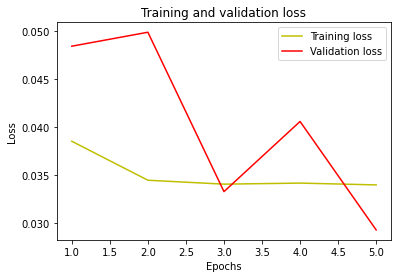

In [ ]:
import matplotlib.pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

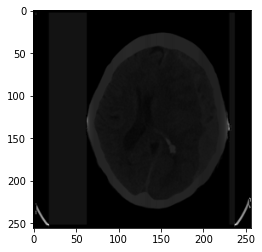

In [ ]:
x_sample=X_val[5]
x_sample=np.reshape(x_sample,(256,256))
plt.imshow(x_sample,cmap='gray')

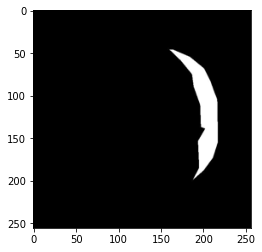

In [ ]:
y_sample=y_val[5]
y_sample=np.reshape(y_sample,(256,256))
plt.imshow(y_sample,cmap='gray')

In [ ]:
X_val.shape
Y_predicted=model.predict(X_val)
#Y_predicted=np.reshape(Y_predicted,(256,256))
#plt.imshow(Y_predicted,cmap='gray')

1/1 [==============================] - 3s 3s/step


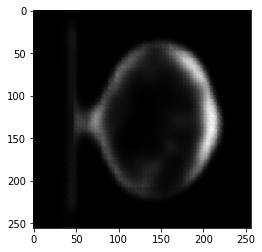

In [ ]:
Y_predicted=np.reshape(Y_predicted,(-1,256,256))
plt.imshow(Y_predicted[5],cmap='gray')

In [ ]:
yoo=Y_predicted[5]*255

In [ ]:
ret,thresh1 = cv2.threshold(yoo,35,255,cv2.THRESH_BINARY)

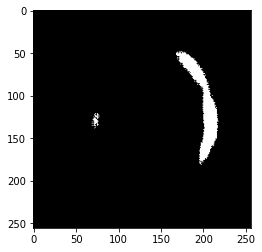

In [ ]:
plt.imshow(thresh1,cmap='gray')

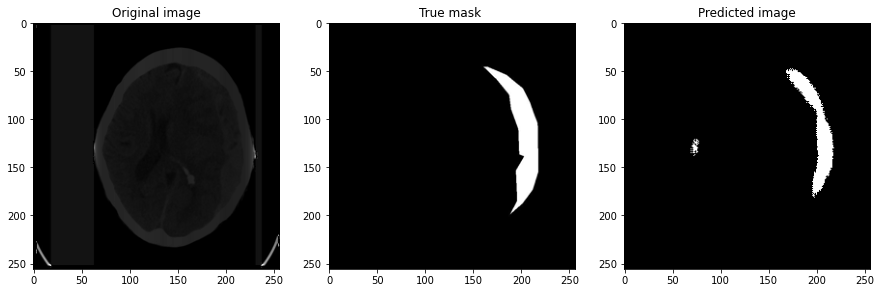

In [ ]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)

plt.subplot(131)
plt.title('Original image')
plt.imshow(x_sample,cmap='gray')


plt.subplot(132)
plt.title('True mask ')
plt.imshow(y_sample,cmap='gray')

  
plt.subplot(133)
plt.title('Predicted image')
plt.imshow(thresh1,cmap='gray')
